In [88]:
#Customer churn prediction is the process of analyzing data to identify customers who are likely to cancel their subscriptions or stop using a service.
!pip install pandas
!pip install numpy
!pip install matplotlib
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/8.1 MB 5.6 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 4.3 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 4.2 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- ---

In [50]:
df=pd.read_csv("customer-churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6514,6166-YIPFO,Male,0,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,64.70,4746.05,No
1921,6732-VAILE,Male,0,Yes,Yes,70,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.95,5931.75,No
6089,8775-LHDJH,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.60,90.6,Yes
4004,5803-NQJZO,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),67.80,4804.65,No
5401,5124-EOGYE,Male,0,No,No,31,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,638.55,No


In [52]:
#while working with machine learning customer id is useless
df.drop('customerID',axis='columns',inplace=True)

In [54]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [55]:
df.TotalCharges.values #it gives string value

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [58]:
df.MonthlyCharges.values #it gives numerical value

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [60]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [62]:
#make a dataframe
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [64]:
df.shape

(7043, 20)

In [66]:
df.iloc[438]#specific id

gender                                   Male
SeniorCitizen                               0
Partner                                   Yes
Dependents                                 No
tenure                                     35
PhoneService                              Yes
MultipleLines                             Yes
InternetService                   Fiber optic
OnlineSecurity                             No
OnlineBackup                               No
DeviceProtection                           No
TechSupport                               Yes
StreamingTV                                No
StreamingMovies                           Yes
Contract                       Month-to-month
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          89.85
TotalCharges                           3161.2
Churn                                      No
Name: 438, dtype: object

In [68]:
df1=df[df.TotalCharges!=" "]#dataframe that show total charges that is  not equal to "space"

In [70]:
df1.shape

(7032, 20)

In [72]:
df1.dtypes #dtypes used to show datatype of the df1

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [74]:
df1_TotalCharges= pd.to_numeric(df1.TotalCharges)

In [76]:
df1_TotalCharges.dtypes

dtype('float64')

In [90]:
tenure_churn_no =df1[df1.Churn=="No"].tenure
tenure_churn_yes =df1[df1.Churn=="Yes"].tenure # if we use () instead of [] we get an error of datafarame is not callable.


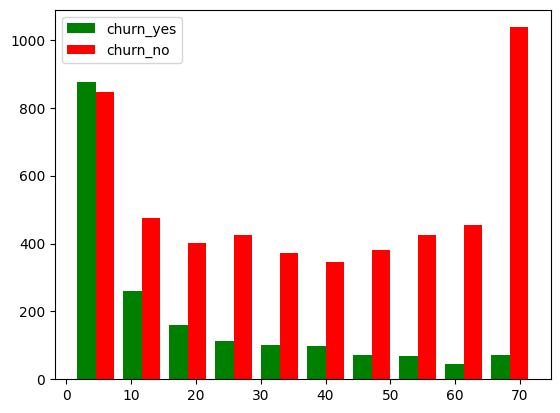

In [91]:
#DATA VISUALIZATION(histogram) in the context of customer churn prediction, "tenure churn yes" generally means that the model predicts that a customer with a specific length of time (tenure) with the company is likely to churn (stop using the product or service). Essentially, it indicates that the model's prediction for that customer is that they will cancel their subscription or discontinue their relationship with the busines
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churn_yes','churn_no'])
plt.legend() #A legend is an area describing the elements of the graph. In the Matplotlib library, there’s a function called legend() which is used to place a legend on the axes.

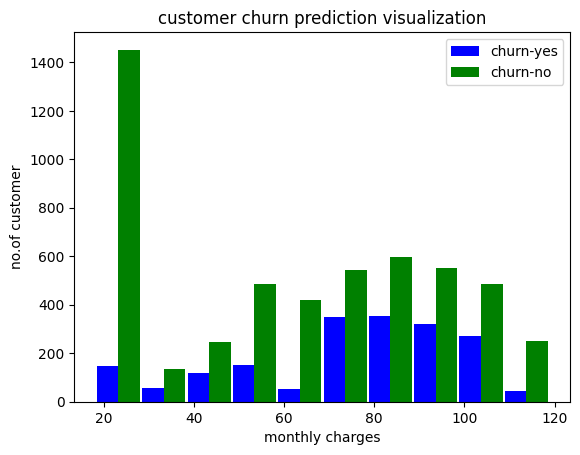

In [93]:
mc_churn_no =df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes =df1[df1.Churn=="Yes"].MonthlyCharges

plt.xlabel("monthly charges")
plt.ylabel("no.of customer")
plt.title("customer churn prediction visualization")
plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['blue','green'],label=['churn-yes','churn-no'])
plt.legend()


In [94]:
for column in df:
    print(column) 

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [95]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} :{df[column].unique()}')#it will print qnique column of df & Python f-strings represent a powerful and intuitive way to format strings. f-strings have changed how developers handle string formatting in Python, making code more readable and maintainable than ever before. F-strings are string literals prefixed with 'f' or 'F' that contain expressions inside curly braces {}.

In [96]:
print_unique_col_values(df)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :['No' 'Yes']


In [97]:
# data cleaning
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\RITI RAI\AppData\Local\Temp\ipykernel_2848\1630524913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\RITI RAI\AppData\Local\Temp\ipykernel_2848\1630524913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [99]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :['No' 'Yes']


In [100]:
# as we all know machine language do not understand categorical value, so we have to change in 0,1
yes_no_column=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_column:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\RITI RAI\AppData\Local\Temp\ipykernel_2848\156304726.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\RITI RAI\AppData\Local\Temp\ipykernel_2848\156304726.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes':

In [101]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:[0 1]


In [110]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1['gender'].unique()

C:\Users\RITI RAI\AppData\Local\Temp\ipykernel_2848\2749699388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\RITI RAI\AppData\Local\Temp\ipykernel_2848\2749699388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'

array([1, 0])

In [112]:
# We use  pandas dummy function to  remove month-to-month as 1 and other as 0(the get_dummies() function converts categorical variables into dummy/indicator variables (known as one-hot encoding). This method is especially useful when preparing data for machine learning algorithms that require numeric input.

#Syntax: pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, drop_first=False, dtype=None)
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])

In [113]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [116]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6546,0,0,0,0,24,1,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
1488,0,0,0,0,1,1,0,1,0,0,...,True,False,False,True,False,False,False,False,False,True
890,0,0,1,1,31,1,1,1,0,1,...,False,True,False,True,False,False,False,False,True,False
5601,1,0,1,1,35,0,0,0,0,0,...,True,False,False,False,True,False,False,False,False,True
3109,0,0,0,0,56,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [118]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [135]:
#scaling
!pip install scikit-learn
cols_to_scale= ['tenure','MonthlyCharges','TotalCharges','InternetService_DSL','InternetService_Fiber optic','InternetService_No','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler( )
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [136]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5612,1,0,0,0,0.619718,1,0,1,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5298,1,1,1,0,0.830986,1,1,0,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4846,0,0,0,0,0.084507,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [137]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [138]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [139]:
#train and test data before fitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [140]:
x_train.shape

(5625, 26)

In [147]:
x_test.shape

(1407, 26)

In [149]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [151]:
len(x_train.columns)

26

In [153]:
!pip install --upgrade pip

ERROR: To modify pip, please run the following command:
C:\Users\RITI RAI\anaconda3\envs\tf-jupyter\python.exe -m pip install --upgrade pip



  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)


In [154]:
!python --version


Python 3.10.16


In [162]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,input_shape=(26,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

C:\Users\RITI RAI\anaconda3\envs\tf-jupyter\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5713 - loss: 0.6746
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.4324
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7971 - loss: 0.4319
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8043 - loss: 0.4143
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7995 - loss: 0.4128
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8050 - loss: 0.4062
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8069 - loss: 0.4120
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8083 - loss: 0.4027
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8062 - loss: 0.4086
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8132 - loss: 0.4055
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8054 - loss: 0.4081
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [164]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7953 - loss: 0.4401


[0.44784751534461975, 0.7853589057922363]

In [176]:
yp=model.predict(x_test)
yp[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


array([[0.21826182],
       [0.40662506],
       [0.01151278],
       [0.8033926 ],
       [0.49509004],
       [0.73760724],
       [0.12076477],
       [0.4675876 ],
       [0.21400319],
       [0.20677707]], dtype=float32)

In [184]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [178]:
y_pred=[]
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [179]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [186]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       999
           1       0.68      0.48      0.57       408

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.77      0.79      0.77      1407



Text(95.72222222222221, 0.5, 'truth')

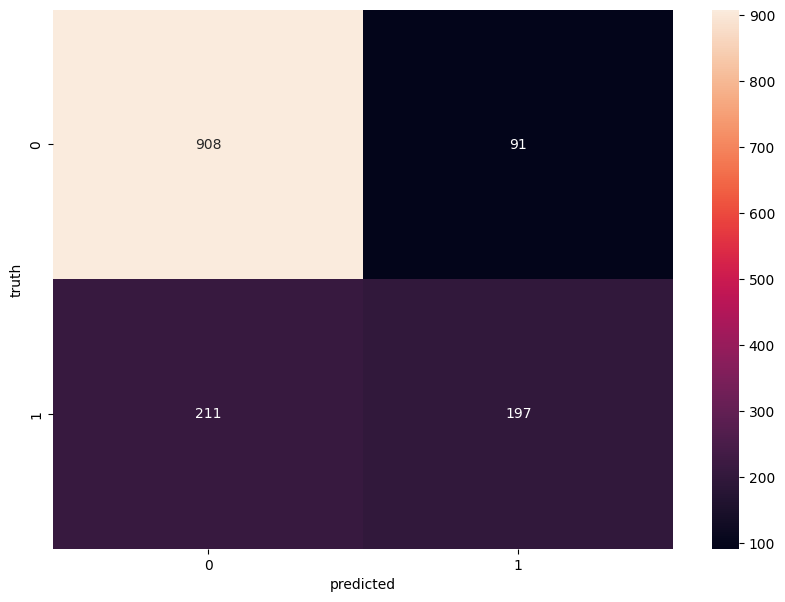

In [196]:
!pip install seaborn
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [215]:
 round((908+197)/(908+197+91+211),2)


0.79

precision for 0 class i.e; precision for customer who did not churn


In [217]:
round(908/(908+211),2)

0.81

precision for 1 class i.e; precision for customer acctually churned

In [219]:
round(197/(197+91),2)

0.68

recall for 0

In [221]:
round(908/(908+91),2)

0.91

In [223]:
round(197/(197+211),2)

0.48